In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import roc_curve,auc
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv(r'../data/final_data.csv')

In [3]:
data.head()

,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,price,freight_value,product_name_length,product_description_length,...,delivery_days,estimated_days,ships_in,arrival_time,delivery_impression,estimated_del_impression,ship_impression,seller_popularity,existing_cust,Score
0,1,credit_card,1,18.12,sao paulo,SP,29.99,8.72,40.0,268.0,...,8,16,4,Early/OnTime,Fast,Neutral,Fast,58,1,1.0
1,3,voucher,1,2.00,sao paulo,SP,29.99,8.72,40.0,268.0,...,8,16,4,Early/OnTime,Fast,Neutral,Fast,58,1,1.0
2,2,voucher,1,18.59,sao paulo,SP,29.99,8.72,40.0,268.0,...,8,16,4,Early/OnTime,Fast,Neutral,Fast,58,1,1.0
3,1,credit_card,3,179.12,vianopolis,GO,159.90,19.22,46.0,232.0,...,9,27,5,Early/OnTime,Fast,Slow,Fast,1170,0,1.0
4,1,credit_card,1,72.20,sao goncalo do amarante,RN,45.00,27.20,59.0,468.0,...,14,27,5,Early/OnTime,Fast,Slow,Fast,161,0,1.0


In [4]:
data.columns

Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_city', 'customer_state', 'price',
       'freight_value', 'product_name_length', 'product_description_length',
       'product_photos_qty', 'seller_state', 'product_category_name',
       'delivery_days', 'estimated_days', 'ships_in', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'ship_impression',
       'seller_popularity', 'existing_cust', 'Score'],
      dtype='object')

In [5]:
#spliting data to train and test data
X = data.drop('Score',axis=1)
Y = data.Score.values

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.15,stratify=Y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(86956, 22) (15346, 22) (86956,) (15346,)


In [6]:
std_scaler = Normalizer()
min_max = MinMaxScaler()

#payment_sequential feature
payment_sequential_train = std_scaler.fit_transform(X_train.payment_sequential.values.reshape(-1,1))
payment_sequential_test = std_scaler.transform(X_test.payment_sequential.values.reshape(-1,1))

#payment_installments feature
payment_installments_train = std_scaler.fit_transform(X_train.payment_installments.values.reshape(-1,1))
payment_installments_test = std_scaler.transform(X_test.payment_installments.values.reshape(-1,1))

#Payment value feature
payment_value_train = std_scaler.fit_transform(X_train.payment_value.values.reshape(-1,1))
payment_value_test = std_scaler.transform(X_test.payment_value.values.reshape(-1,1))

#price
price_train = std_scaler.fit_transform(X_train.price.values.reshape(-1,1))
price_test = std_scaler.transform(X_test.price.values.reshape(-1,1))

#freight_value
freight_value_train = std_scaler.fit_transform(X_train.freight_value.values.reshape(-1,1))
freight_value_test = std_scaler.transform(X_test.freight_value.values.reshape(-1,1))

#product_name_length
product_name_length_train = std_scaler.fit_transform(X_train.product_name_length.values.reshape(-1,1))
product_name_length_test = std_scaler.transform(X_test.product_name_length.values.reshape(-1,1))

#product_description_length
product_description_length_train = std_scaler.fit_transform(X_train.product_description_length.values.reshape(-1,1))
product_description_length_test = std_scaler.transform(X_test.product_description_length.values.reshape(-1,1))

#product_photos_qty
product_photos_qty_train = std_scaler.fit_transform(X_train.product_photos_qty.values.reshape(-1,1))
product_photos_qty_test = std_scaler.transform(X_test.product_photos_qty.values.reshape(-1,1))

#delivery_days
delivery_days_train = std_scaler.fit_transform(X_train.delivery_days.values.reshape(-1,1))
delivery_days_test = std_scaler.transform(X_test.delivery_days.values.reshape(-1,1))

#estimated_days
estimated_days_train = std_scaler.fit_transform(X_train.estimated_days.values.reshape(-1,1))
estimated_days_test = std_scaler.transform(X_test.estimated_days.values.reshape(-1,1))

#ships_in
ships_in_train = std_scaler.fit_transform(X_train.ships_in.values.reshape(-1,1))
ships_in_test = std_scaler.transform(X_test.ships_in.values.reshape(-1,1))

#seller_popularity
seller_popularity_train = min_max.fit_transform(X_train.seller_popularity.values.reshape(-1,1))
seller_popularity_test = min_max.transform(X_test.seller_popularity.values.reshape(-1,1))

In [7]:
#initialising oneHotEncoder

onehot = CountVectorizer()
cat = OneHotEncoder()
#payment_type
payment_type_train = onehot.fit_transform(X_train.payment_type.values)
payment_type_test = onehot.transform(X_test.payment_type.values)


#customer_state
customer_state_train = onehot.fit_transform(X_train.customer_state.values)
customer_state_test = onehot.transform(X_test.customer_state.values)

#seller_state
seller_state_train = onehot.fit_transform(X_train.seller_state.values)
seller_state_test = onehot.transform(X_test.seller_state.values)


#product_category_name
product_category_name_train = onehot.fit_transform(X_train.product_category_name.values)
product_category_name_test = onehot.transform(X_test.product_category_name.values)


#arrival_time
arrival_time_train = onehot.fit_transform(X_train.arrival_time.values)
arrival_time_test = onehot.transform(X_test.arrival_time.values)

#delivery_impression
delivery_impression_train = onehot.fit_transform(X_train.delivery_impression.values)
delivery_impression_test = onehot.transform(X_test.delivery_impression.values)


#estimated_del_impression
estimated_del_impression_train = onehot.fit_transform(X_train.estimated_del_impression.values)
estimated_del_impression_test = onehot.transform(X_test.estimated_del_impression.values)

#ship_impression
ship_impression_train = onehot.fit_transform(X_train.ship_impression.values)
ship_impression_test = onehot.transform(X_test.ship_impression.values)


#existing_cust
existing_cust_train = cat.fit_transform(X_train.existing_cust.values.reshape(-1,1))
existing_cust_test = cat.transform(X_test.existing_cust.values.reshape(-1,1))

In [8]:
#stacking up all the encoded features
X_train_vec = hstack((payment_sequential_train,payment_installments_train,payment_value_train,price_train,
                      freight_value_train,product_name_length_train,product_description_length_train,
                      product_photos_qty_train,delivery_days_train,estimated_days_train,ships_in_train,
                      payment_type_train,customer_state_train,seller_state_train,product_category_name_train,
                      arrival_time_train,delivery_impression_train,estimated_del_impression_train,
                     ship_impression_train,seller_popularity_train))

X_test_vec = hstack((payment_sequential_test,payment_installments_test,payment_value_test,price_test,
                      freight_value_test,product_name_length_test,product_description_length_test,
                      product_photos_qty_test,delivery_days_test,estimated_days_test,ships_in_test,
                      payment_type_test,customer_state_test,seller_state_test,product_category_name_test,
                      arrival_time_test,delivery_impression_test,estimated_del_impression_test,
                      ship_impression_test,seller_popularity_test))

print(X_train_vec.shape,X_test_vec.shape)


(86956, 153) (15346, 153)


In [9]:
#Naive Bayes
naive = MultinomialNB(class_prior=[0.5,0.5])

param = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000]}

#for the bow based model
NB = GridSearchCV(naive,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
NB.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [10]:
NB.best_params_

{'alpha': 0.0001}

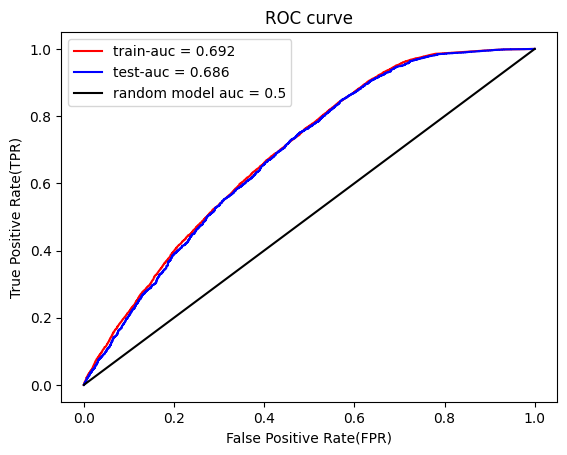

Best AUC for the model is 0.686 


In [11]:
clf = MultinomialNB(alpha=0.0001,class_prior=[0.5,0.5])
clf.fit(X_train_vec,y_train)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

In [12]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.8608
Test F1_score for this model is :  0.8627


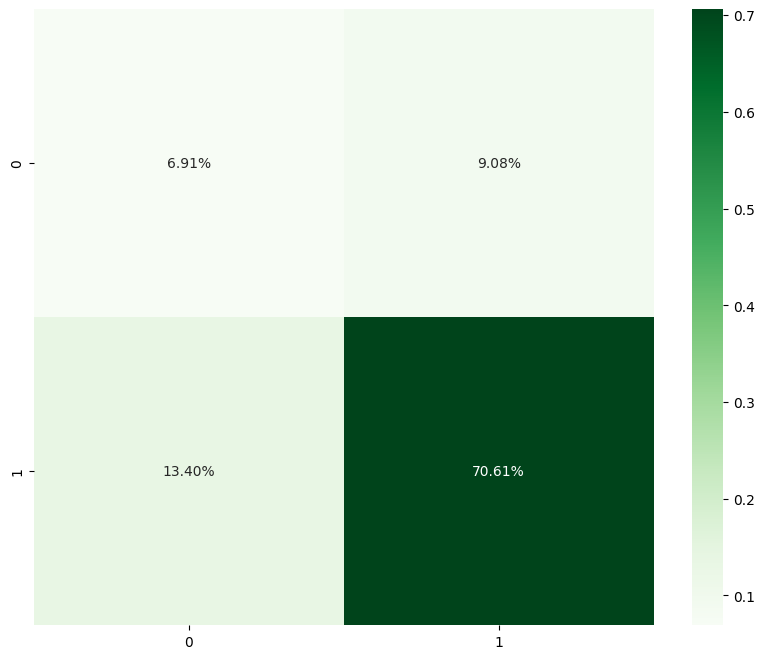

In [13]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [14]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7728
Test Accuracy score for this model :  0.7752


In [17]:
type(pred_label_train)

numpy.ndarray

**Observations**

1. Naive bayes performed pretty decent in terms of minimal overfitting in train and test performances.
2. Both train and test f1 score was 0.86 and accuracy 77%.
3. But the confusion matrix says it has misclassified many points as False Positives.
4. AUC score for test data was 0.68.

In [14]:
# Logistic Regression
#we have used max_iter 1000 as it was causing exception while fitting
logistic = LogisticRegression(max_iter=1000,solver='lbfgs')

param = {'C': [0.0001,0.001,0.01,0.1,1,10,20,30]}

#for the bow based model
LR = GridSearchCV(logistic,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
LR.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [15]:
LR.best_params_

{'C': 0.1}

**NOTE**

1. For performance measurement we will not use accuracy as a metric as the data set is highly imbalanced.
2. We will use AUC score and f1 score as performance metric.

In [16]:
#model
clf = LogisticRegression(C=0.1,max_iter=1000,solver='lbfgs')
clf.fit(X_train_vec,y_train)

LogisticRegression(C=0.1, max_iter=1000)

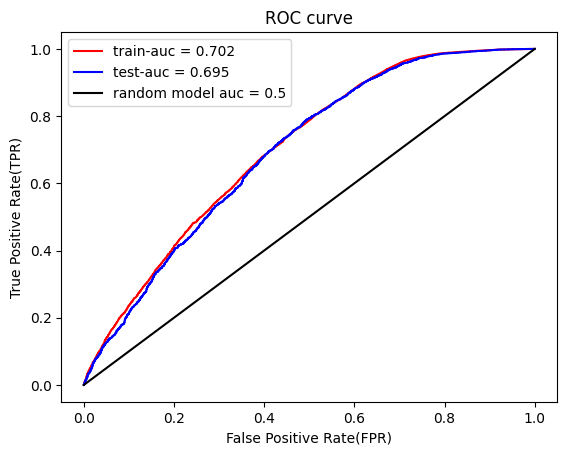

Best AUC for the model is 0.695 


In [17]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

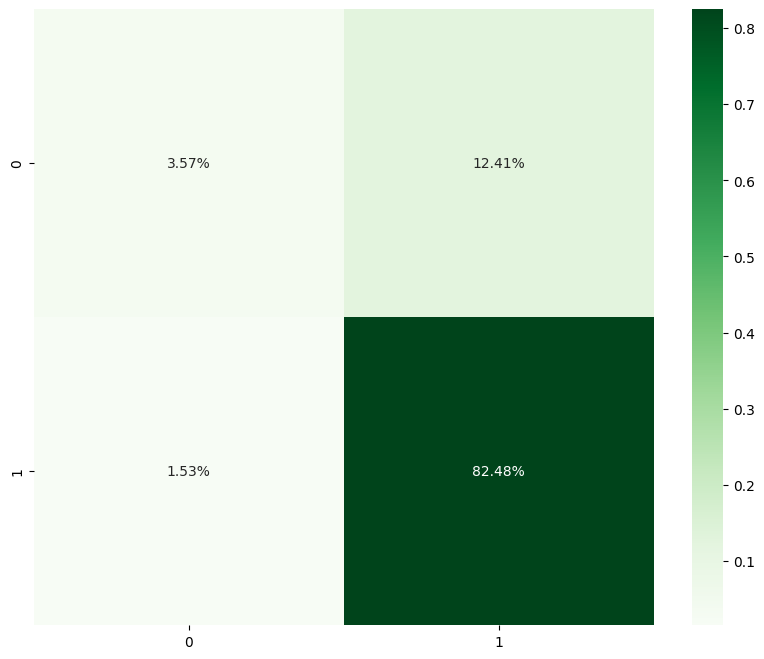

In [18]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [19]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9228
Test F1_score for this model is :  0.9221


In [20]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.862
Test Accuracy score for this model :  0.8605


**Observations**

1. Logistic regression performs considerably better than Naive bayes in terms of f1 score, however AUC score being almost the same.
2. Misclassification of False positives reduced which resulted in the increase of f1 score of 92%.
3. Accuracy was 86% for both train and test which shows the model doesn't overfit at all.

In [21]:
# Decision Tree
#model initialize
DT = DecisionTreeClassifier(class_weight='balanced')

#hyper parameters
param = {'max_depth':  [1, 5,10,15,20], 'min_samples_split': [5, 10, 100, 300,500,1000]}

#Grid search CV
DT = GridSearchCV(DT,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
DT.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_split': [5, 10, 100, 300, 500, 1000]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [22]:
#best params
DT.best_params_

{'max_depth': 20, 'min_samples_split': 500}

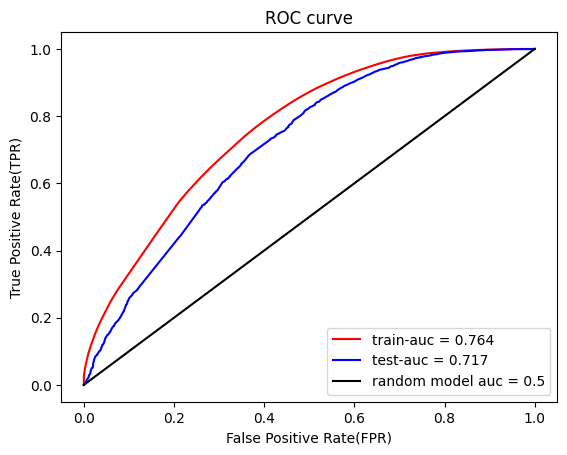

Best AUC for the model is 0.717 


In [23]:
#model
clf = DecisionTreeClassifier(class_weight='balanced',max_depth=20,min_samples_split=300)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

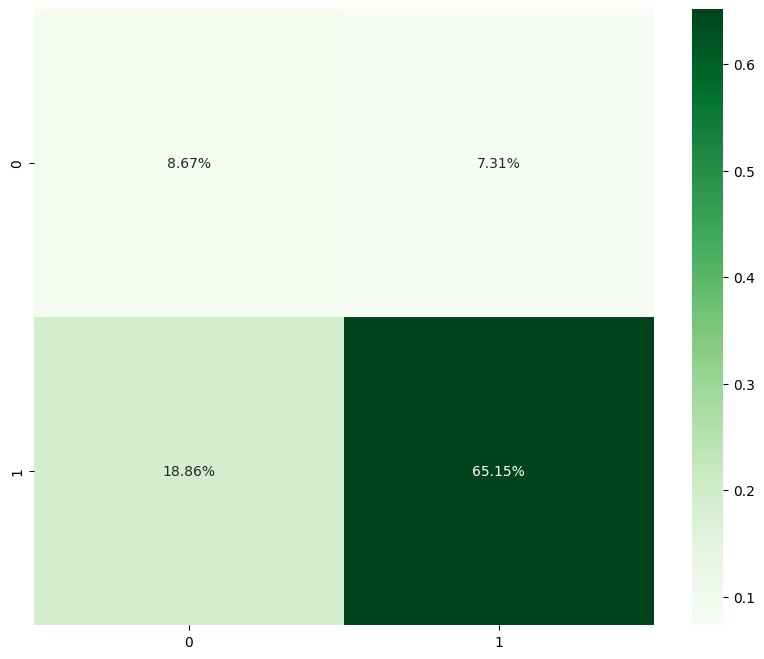

In [24]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [25]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.8412
Test F1_score for this model is :  0.8327


In [26]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7525
Test Accuracy score for this model :  0.7382


**Observations**

1. Decision Tree does nothing better interms of both f1 score , auc score and accuracy comes out to be 0.708 and 73%.
2. It misclassfied False Positives to a lot.
3. Model doesn't overfit but doesn't perform better either.

In [27]:
# Random Forest 
#param grid
#we have limit max_depth to 10 so that the model doesn't overfit
param = { 'min_samples_split':[5,10,30,50,100],'max_depth':[5,7,10]}

#Random forest classifier
RFclf = RandomForestClassifier(class_weight='balanced')

#using grid search cv to tune parameters
RF = GridSearchCV(RFclf,param,cv=5,refit=False,n_jobs=-1,verbose=1,return_train_score=True,scoring='roc_auc')
RF.fit(X_train_vec,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_split': [5, 10, 30, 50, 100]},
             refit=False, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [28]:
RF.best_params_

{'max_depth': 10, 'min_samples_split': 5}

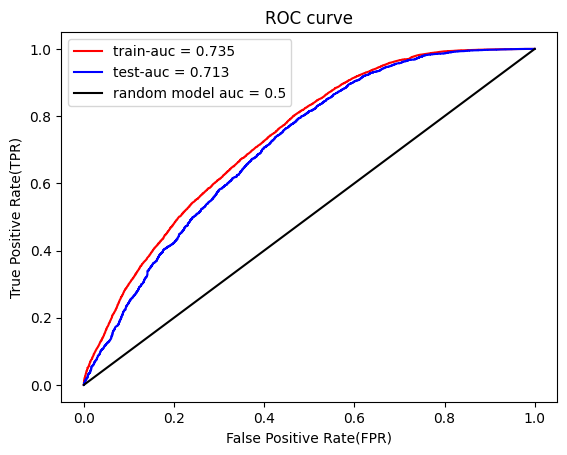

Best AUC for the model is 0.713 


In [29]:
#model
clf = RandomForestClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

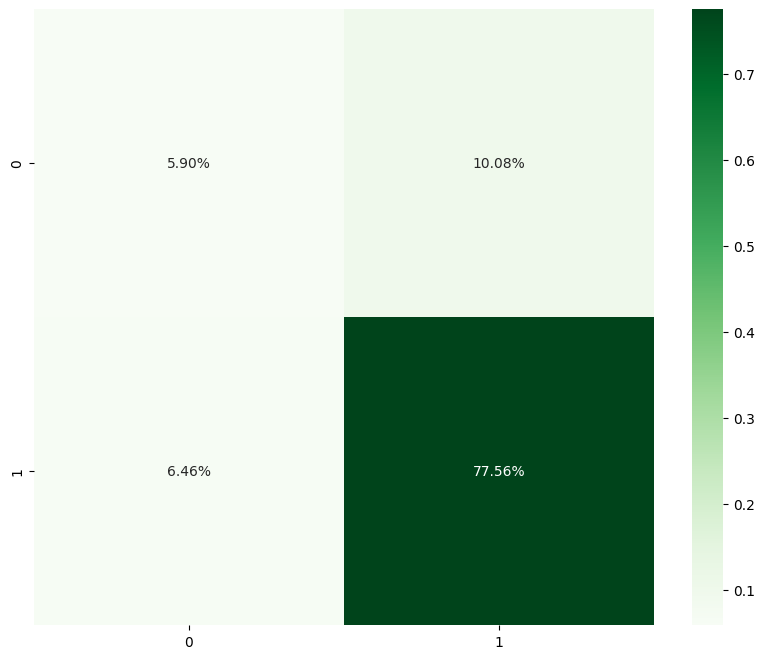

In [30]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [31]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9055
Test F1_score for this model is :  0.9037


In [32]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8379
Test Accuracy score for this model :  0.8346


**Observations**

1. Random forest performs better than logistic regression in terms of f1 score and accuracy.
2. It gives an f1 score of 90% and doesn't seem to overfit.
3. Misclassification rate is still not that great.
4. AUC is score is 0.718
5. Accuracy score is 83%.

In [33]:
# Gradient Boosting
#param grid
#we have limit max_depth to 8 so that the model doesn't overfit
param = { 'min_samples_split' : [5,10,30,50],'max_depth' : [3,5,7,8]}

GBDTclf = GradientBoostingClassifier()

clf = GridSearchCV(RFclf,param,cv=5,refit=False,return_train_score=True,scoring='roc_auc')
clf.fit(X_train_vec,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 5, 7, 8],
                         'min_samples_split': [5, 10, 30, 50]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [34]:
#best parameters
clf.best_params_

{'max_depth': 8, 'min_samples_split': 10}

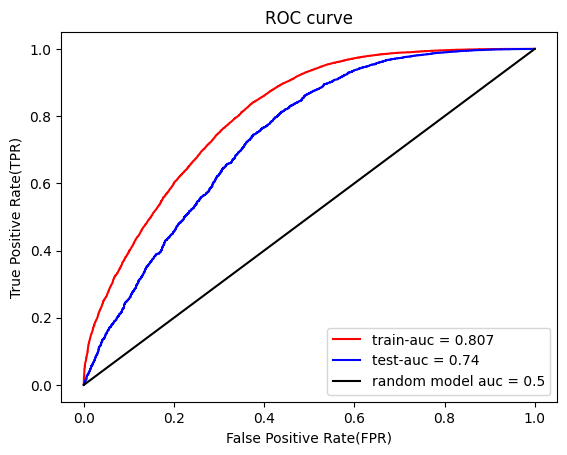

Best AUC for the model is 0.74 


In [35]:
#Model
clf = GradientBoostingClassifier(max_depth=8,min_samples_split=5)
clf.fit(X_train_vec,y_train)

# save the model to disk
Pkl_Filename = "../saved_model/final_model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)
#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

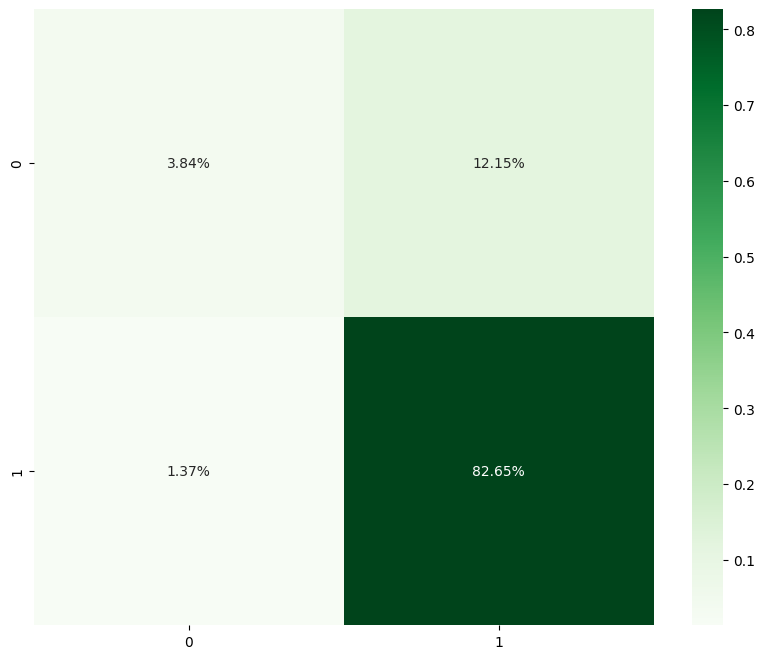

In [36]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_test/np.sum(cf_matrix_test), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [37]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9311
Test F1_score for this model is :  0.9244


In [38]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8769
Test Accuracy score for this model :  0.8649


**Observations**
  
1. Gradient Boosted classifier results the best f1 score of 0.9243 and auc score of 0.745.
2. Misclassification of False Positives and True negetives is also reduced to 11% also true positive rate is 83%.
3. Accuracy score is 86% for test and 87% for train data.
4. Model does overfit a slight comapred to rest of the models.

In [39]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "F1_score", " AUC_score "," Accuracy "]

table.add_row([ "Naive Bayes",'0.8575','0.694','0.7689'])
table.add_row(["Logistic Regression",'0.9217','0.699','0.8605'])
table.add_row(["Decision Tree",'0.8031','0.713','0.7021'])
table.add_row(["Random Forest",'0.9013','0.718','0.8315'])
table.add_row(["GBDT**(BEST)",'0.9243','0.745','0.8651'])

print(table)

+---------------------+----------+-------------+------------+
|        Model        | F1_score |  AUC_score  |  Accuracy  |
+---------------------+----------+-------------+------------+
|     Naive Bayes     |  0.8575  |    0.694    |   0.7689   |
| Logistic Regression |  0.9217  |    0.699    |   0.8605   |
|    Decision Tree    |  0.8031  |    0.713    |   0.7021   |
|    Random Forest    |  0.9013  |    0.718    |   0.8315   |
|     GBDT**(BEST)    |  0.9243  |    0.745    |   0.8651   |
+---------------------+----------+-------------+------------+


**Summary**

1. GBDT performs better in comparision to rest of the model in terms of all the performance metric.
2. Logistic regression performs fairly similar to GBDT, but GBDT is more robust to outliers.
3. Rating prediction is not fairly dependent directly on most of the features, so the performance is not at its peak.
4. We have used f1 score as our primary performance metric.
5. We have taken care of overfitting in each model.
6. Each model performed better after we removed neutral review score from the data.